# IMPORTING PYTHON PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# IMPORTING DATASET

In [2]:
df_income=pd.read_csv('income.csv')
df_income

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


IMPUTER

In [3]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(df_income.values)
df=imp.transform(df_income)
df_income=pd.DataFrame(df)
df_income

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


LABEL ENCODING

In [4]:
le=LabelEncoder()
list=[1,3,5,6,7,8,9,13,14]
for val in list:
    df_income[val]=le.fit_transform(df_income[val].astype(str))
df_income

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


# EXPLORATORY DATA ANALYSIS

In [5]:
df_income.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [6]:
df_income.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0
32560,52,4,287927,11,9,2,3,5,4,0,15024,0,40,38,1


In [7]:
df_income.shape

(32561, 15)

In [8]:
df_income.dtypes

0     object
1      int32
2     object
3      int32
4     object
5      int32
6      int32
7      int32
8      int32
9      int32
10    object
11    object
12    object
13     int32
14     int32
dtype: object

In [9]:
list=[0,2,4,10,11,12]
for i in list:
    df_income[i] = df_income[i].astype(str).astype(int)
df_income.dtypes

0     int32
1     int32
2     int32
3     int32
4     int32
5     int32
6     int32
7     int32
8     int32
9     int32
10    int32
11    int32
12    int32
13    int32
14    int32
dtype: object

In [10]:
df_income.columns

RangeIndex(start=0, stop=15, step=1)

In [11]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int32
1     32561 non-null int32
2     32561 non-null int32
3     32561 non-null int32
4     32561 non-null int32
5     32561 non-null int32
6     32561 non-null int32
7     32561 non-null int32
8     32561 non-null int32
9     32561 non-null int32
10    32561 non-null int32
11    32561 non-null int32
12    32561 non-null int32
13    32561 non-null int32
14    32561 non-null int32
dtypes: int32(15)
memory usage: 1.9 MB


In [12]:
df_income.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.094438,1.897784e+05,10.298210,10.080679,2.611836,6.138755,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.417155,0.240810
std,13.640433,1.107194,1.055500e+05,3.870264,2.572720,1.506222,3.972708,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,6.056047,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783560e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370510e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


Data in the columns 10 and 11 do not appear to have normal distribution. Data in all other columns appear to have normal distribution (mean very close to 50th percentile).

In [13]:
#sns.heatmap(df_income.isnull(),annot=True)

In [14]:
df_income.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

CHECKING DATA SKEWNESS

In [15]:
df_income.skew()

0      0.558743
1      0.076469
2      1.446980
3     -0.934042
4     -0.311676
5     -0.013508
6      0.000565
7      0.786818
8     -2.435386
9     -0.719293
10    11.953848
11     4.594629
12     0.227643
13    -4.243158
14     1.212430
dtype: float64

REMOVING DATA SKEWNESS

In [16]:
for col in df_income.columns:
    if df_income.skew().loc[col]>0.55:
        df_income[col]=np.log1p(df_income[col])
df_income.skew()

0    -0.113341
1     0.076469
2    -0.842461
3    -0.934042
4    -0.311676
5    -0.013508
6     0.000565
7     0.284982
8    -2.435386
9    -0.719293
10    3.096144
11    4.307537
12    0.227643
13   -4.243158
14    1.212430
dtype: float64

CHECKING OUTLIERS

In [17]:
z=np.abs(zscore(df_income))
print(z.shape)
print(np.where(z>3))

(32561, 15)
(array([    4,     8,     9, ..., 32551, 32553, 32560], dtype=int64), array([13, 10, 10, ...,  8,  8, 10], dtype=int64))


REMOVING OUTLIERS

In [18]:
df_final=df_income.loc[(z<3).all(axis=1)]
print(df_final.shape)

(26278, 15)


In [19]:
df_final.skew()

0      -0.065296
1       0.101305
2      -0.806928
3      -0.949578
4      -0.156460
5      -0.085899
6       0.013982
7       0.203290
8      -2.505521
9      -0.653033
10      6.736250
11    162.104904
12     -0.362323
13     -5.237396
14      1.576991
dtype: float64

Column 11 may be dropped.

In [20]:
df_final.drop(df_final.columns[[11]],axis=1,inplace=True)

BOXPLOT

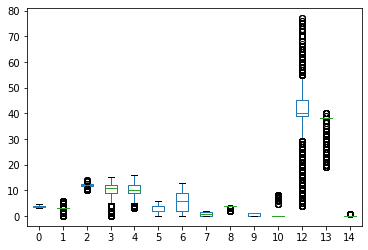

In [21]:
df_final.plot.box()

CORRELATION

In [22]:
df_final.corr()

,0,1,2,3,4,5,6,7,8,9,10,12,13,14
0,1.000000,0.029903,-0.060897,0.012431,0.064782,-0.331444,-0.015960,-0.348822,0.011428,0.094454,0.042882,0.152626,0.033339,0.246868
1,0.029903,1.000000,-0.030617,0.000704,-0.002495,-0.018531,0.009075,-0.064137,0.067193,0.069886,0.006839,0.025904,0.002971,-0.010045
2,-0.060897,-0.030617,1.000000,-0.019715,-0.036992,0.025086,-0.006090,0.026211,-0.111225,0.012374,-0.009022,-0.021658,-0.099997,-0.004222
3,0.012431,0.000704,-0.019715,1.000000,0.362699,-0.036520,-0.044332,-0.007831,0.023924,-0.035679,-0.007651,0.061334,0.092329,0.069321
4,0.064782,-0.002495,-0.036992,0.362699,1.000000,-0.051466,0.068575,-0.085209,0.075746,-0.005261,-0.025138,0.147296,0.151980,0.294985
5,-0.331444,-0.018531,0.025086,-0.036520,-0.051466,1.000000,0.040707,0.259609,-0.084634,-0.123525,-0.000534,-0.200757,-0.031281,-0.186838
6,-0.015960,0.009075,-0.006090,-0.044332,0.068575,0.040707,1.000000,-0.036962,0.002211,0.052730,-0.003561,-0.024429,0.019734,0.030673
7,-0.348822,-0.064137,0.026211,-0.007831,-0.085209,0.259609,-0.036962,1.000000,-0.150780,-0.587022,-0.007929,-0.280507,-0.009696,-0.310454
8,0.011428,0.067193,-0.111225,0.023924,0.075746,-0.084634,0.002211,-0.150780,1.000000,0.122175,0.006461,0.051658,0.016358,0.092250
9,0.094454,0.069886,0.012374,-0.035679,-0.005261,-0.123525,0.052730,-0.587022,0.122175,1.000000,0.002236,0.232093,-0.011630,0.203391


PAIRPLOT

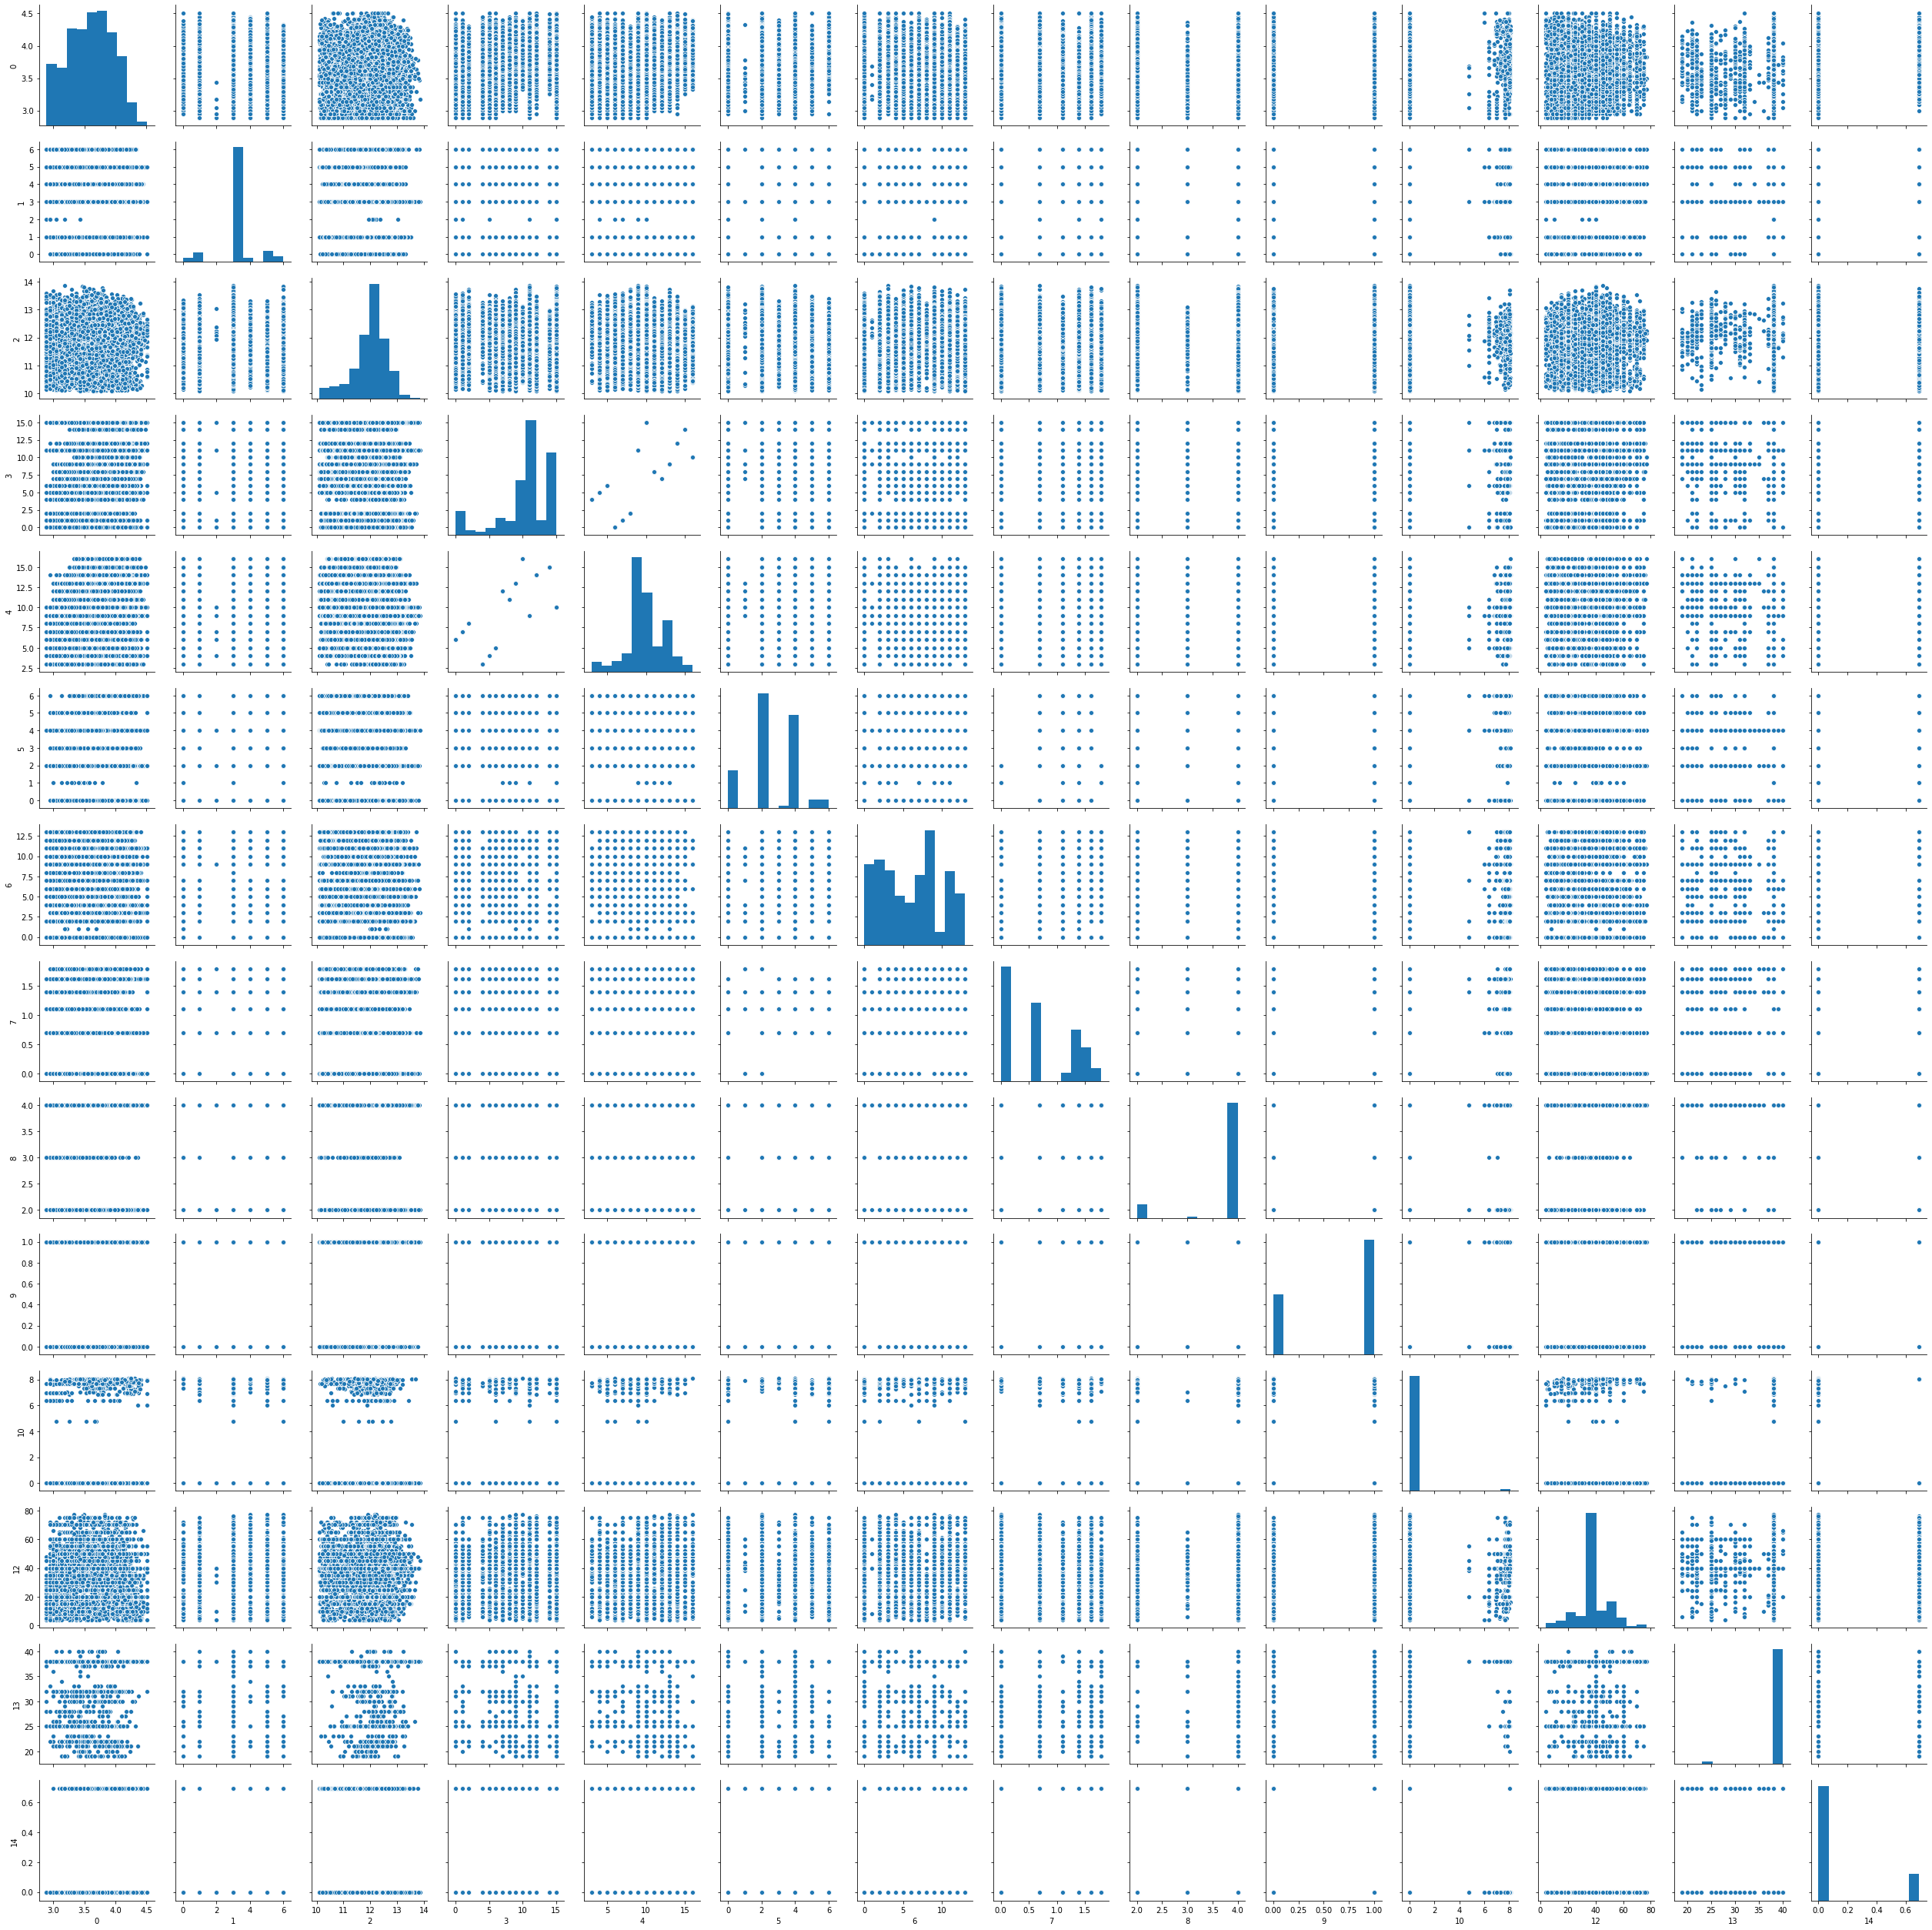

In [23]:
sns.pairplot(df_final)

# TRAIN AND TEST DATA

In [24]:
df_x=df_final.iloc[:,:-1]
print(df_x)
y=df_final.iloc[:,-1]
print(y)
print()
print(df_x.shape)
print(y.shape)

             0   1          2   3   4   5   6         7   8   9         10  \
0      3.688879   6  11.258253   9  13   4   0  0.693147   4   1  7.684784   
1      3.931826   5  11.330348   9  13   2   3  0.000000   4   1  0.000000   
2      3.663562   3  12.281398  11   9   0   5  0.693147   4   1  0.000000   
3      3.988984   3  12.366157   1   7   2   5  0.000000   2   1  0.000000   
5      3.637586   3  12.558780  12  14   2   3  1.791759   4   0  0.000000   
...         ...  ..        ...  ..  ..  ..  ..       ...  ..  ..       ...   
32555  3.135494   3  12.644821  15  10   4  10  0.693147   4   1  0.000000   
32556  3.332205   3  12.458010   7  12   2  12  1.791759   4   0  0.000000   
32557  3.713572   3  11.947140  11   9   2   6  0.000000   4   1  0.000000   
32558  4.077537   3  11.931050  11   9   6   0  1.609438   4   0  0.000000   
32559  3.135494   3  12.213500  11   9   4   0  1.386294   4   1  0.000000   

       12  13  
0      40  38  
1      13  38  
2      40  38  

In [25]:
x=df_x

# TRAINING AND TESTING - VARIOUS MODELS

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=10,stratify=y)

In [27]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(15766, 13) (10512, 13)
(15766,) (10512,)


CLASSIFIERS

In [28]:
knn=KNeighborsClassifier(n_neighbors=10)
dtc=DecisionTreeClassifier(random_state=10)
gnb=GaussianNB()
rfc=RandomForestClassifier()

In [29]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))

FUNCTION DECLARATION

************* KNeighborsClassifier *************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


Accuracy Score =  1.0


cross_val_score =  1.0


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10512

    accuracy                           1.00     10512
   macro avg       1.00      1.00      1.00     10512
weighted avg       1.00      1.00      1.00     10512



[[10512]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************* DecisionTreeClassifier *************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       

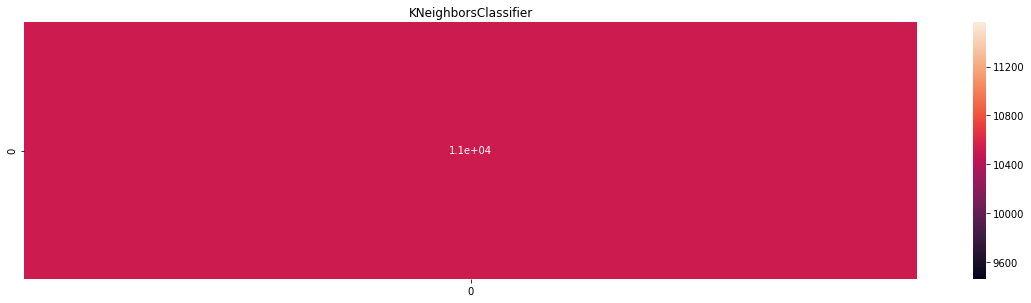

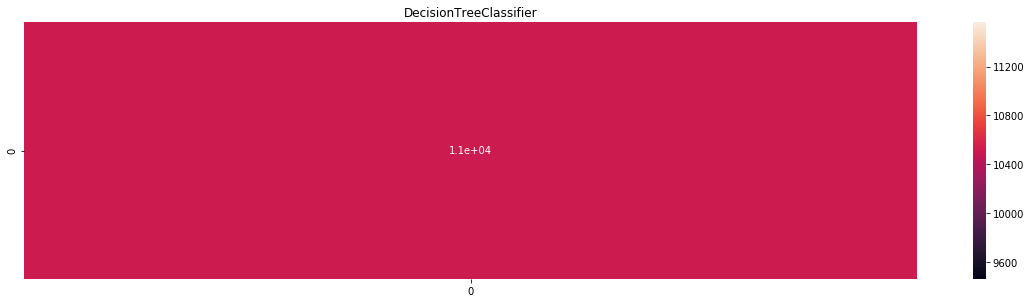

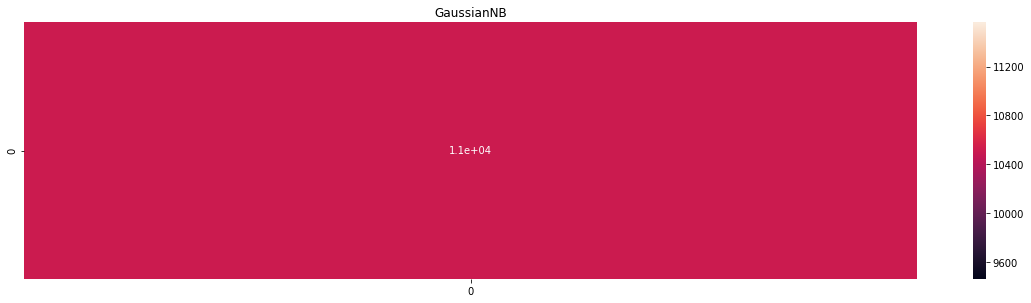

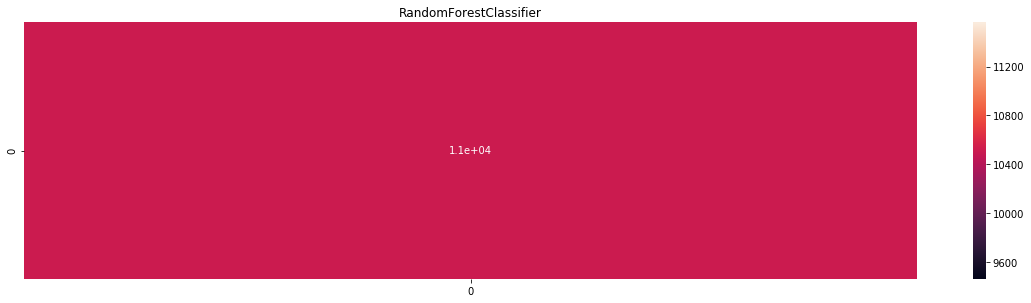

In [30]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*************',name,'*************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train.astype('int'))
    print(model)
    y_pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test.astype('int'),y_pred)
    print('Accuracy Score = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y.astype('int'),cv=5,scoring='accuracy').mean()
    print('cross_val_score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test.astype('int'),y_pred))
    print('\n')
    cm=confusion_matrix(y_test.astype('int'),y_pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(20,50))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')

# BEST MODEL

In [31]:
result=pd.DataFrame({'Model ':Model,'Accuracy Score ':score,'Cross_Val_Score':cvs})
result

,Model,Accuracy Score,Cross_Val_Score
0,KNeighborsClassifier,100.0,100.0
1,DecisionTreeClassifier,100.0,100.0
2,GaussianNB,100.0,100.0
3,RandomForestClassifier,100.0,100.0


I choose KNeighbors Classifier for this dataset.

# PICKLE

In [32]:
joblib.dump(knn,'income.pkl')

['income.pkl']